In [17]:
from exogibbs.presets.fastchem import chemsetup
from exogibbs.api.equilibrium import equilibrium_profile, EquilibriumOptions
import jax.numpy as jnp
from jax import config
config.update("jax_enable_x64", True)

temperature_profile = jnp.linspace(2000, 500, 50)  # K
pressure_profile = jnp.logspace(1, -6, 50)  # bar

# chemical setup
chem = chemsetup()

# Thermodynamic conditions
Pref = 1.0  # bar, reference pressure
opts = EquilibriumOptions(epsilon_crit=1e-11, max_iter=10000)

res = equilibrium_profile(
    chem,
    temperature_profile,
    pressure_profile,
    chem.element_vector_reference,
    Pref=Pref,
    options=opts,
)
nk_result = res.x #mixing ratio


In [18]:
jnp.sum(nk_result, axis=1)  # should be 1.0
jnp.argmax(nk_result, axis=1)  # index of the dominant species


Array([449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449,
       449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449,
       449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449,
       449, 449, 449, 449, 449, 449, 449, 449, 449, 449, 449],      dtype=int64)

In [19]:
print(chem.species[449])

H1-


In [23]:
idx_h2o = chem.species.index("H2O1") #H2O
idx_co2 = chem.species.index("C1O2") #CO2
idx_co = chem.species.index("C1O1") #CO
idx_ch4 = chem.species.index("C1H4") #CH4
idx_nh3 = chem.species.index("H3N1") #NH3
idx_hminus = chem.species.index("H1-")

vmr_h2o = nk_result[:, idx_h2o]
vmr_co2 = nk_result[:, idx_co2]
vmr_co = nk_result[:, idx_co]
vmr_ch4 = nk_result[:, idx_ch4]
vmr_nh3 = nk_result[:, idx_nh3]
vmr_hminus = nk_result[:, idx_hminus]


(22.3872113856834, 4.466835921509635e-07)

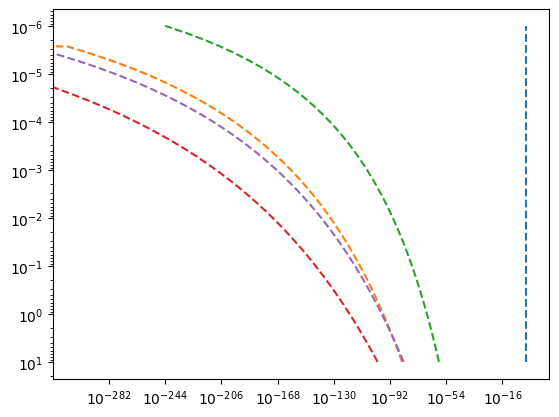

In [24]:
import matplotlib.pyplot as plt
plt.plot(vmr_hminus, pressure_profile, ls='dashed', color='C0')
plt.plot(vmr_co2, pressure_profile, ls='dashed', color='C1')
plt.plot(vmr_co, pressure_profile, ls='dashed', color='C2')
plt.plot(vmr_ch4, pressure_profile, ls='dashed', color='C3')
plt.plot(vmr_nh3, pressure_profile, ls='dashed', color='C4')
plt.xscale('log')
plt.yscale('log')
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])


In [1]:
from exogibbs.presets.ykb4 import chemsetup
from exogibbs.api.equilibrium import equilibrium_profile, EquilibriumOptions
import jax.numpy as jnp
from jax import config
config.update("jax_enable_x64", True)

temperature_profile = jnp.linspace(2000, 500, 50)  # K
pressure_profile = jnp.logspace(1, -6, 50)  # bar

# chemical setup
chem = chemsetup()

# Thermodynamic conditions
Pref = 1.0  # bar, reference pressure
opts = EquilibriumOptions(epsilon_crit=1e-11, max_iter=1000)

res = equilibrium_profile(
    chem,
    temperature_profile,
    pressure_profile,
    chem.element_vector_reference,
    Pref=Pref,
    options=opts,
)
nk_result = res.x #mixing ratio
